# 웹데이터

* Last updated: 20161004 20170311
* 문제3, 연습2,3,4 미완성 (한글 https://wiki.python.org/moin/PrintFails)

## 1.1 학습내용

### 1.1.1 목표

* 웹데이터를 크롤링해서 가져올 수 있다.
* 가져온 웹데이터를 정리하여 (parsing) 분석가능한 형식으로 만들 수 있다.
* xpath, css.selector 사용하여 데이터를 추출할 수 있다.

### 1.1.2 목차

* 1.2 웹으로 나가기
* 1.2.1  웹데이터란? 
* 1.2.2 웹 데이터 가져오기
* 1.3 uri 
* 1.3.1 uri 
* 1.3.2 params
* 1.4 url 가져오기
* 1.4.1 HTTP Request(s)
* 1.4.2 HTTP Response(s)
* 1.4.3 library
* 1.5 Parsing
* 1.5.1 javascript console
* 1.5.2 dom
* 1.5.3 BeautifulSoup
* 1.5.4 regex
* 1.5.5 xpath
* 1.5.6 css selectors

### 1.1.3 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기
    * regex
    * BeautifulSoup
    * xpath
    * css selector
* 웹데이터-2: 웹파일 가져와서 자료구조에 넣기
    * uci 기계학습데이터
* 웹데이터-3: wiki에서 'python'으로 검색해서 http url출력하기
    * REST get query
    * 구글에서 검색하기
    * 위키에서 검색하기
    * 위키에서 css selector
* * 웹데이터-4: 한국 포털사이트에서 노래 제목을 검색
    * 검색 scraping - ?key=value&...
    * regex
    * lxml css selector - 노래제목, 아티스트, 앨범 출력
* 웹데이터-5: 국제학회 목록을 크롤링하기
    * lxml css.selector
* 웹데이터-6: 프로야구 기록 scraping
    * kbreport.com
    * 단순 문자열 검색

### 1.1.4 연습

* 연습 웹데이터-1: 기상청 도별 날씨 가져오기기
* 연습 웹데이터-2: 신문 크롤링 해보기
* 연습 웹데이터-3: 영화


## 1.2 웹으로 나가기

### 1.2.1  웹데이터란?

* 웹은 클라이언트와 서버로 구성된다.
    * 웹클라이언트
        * 웹클라이언트는 보통 웹브라우저를 말한다. Chrome, Internet Explorer, Firefox
        * 웹서버에서 html을 전송하면, 이를 받아서 브라우저에 보여준다.
    * 웹서버
        * 웹서버는 보통 http 서버를 말한다. Microsoft's IIS, Apache server
        * 웹서버는 보통 원격에 위치하며, http 통신을 하기 위해 설치된 소프트웨어를 말한다.

* 웹데이터는 웹 사이트에서 추출된 정보를 말한다.
    * 웹데이터는 웹 사이트에서 http통신으로 교환되는 데이터를 말한다.
    * 웹데이터를 추출하는 것을 마이닝, 스크레이핑, 크롤링이라고 한다.
    * 서버가 반환하는 웹데이터는 보통 html, xml, json 형식을 가진다.

* http
    * http (HpyerText Transfer Protocol)는 웹프로토콜, 서로 데이터를 주고 받는 약속이다.
    * socket 80번 포트를 사용한다.
    * request(s)로 요청하고, response(s)를 반환한다.

In [1]:
import iplantuml

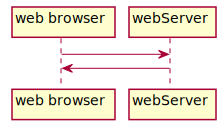

In [4]:
%%plantuml

@startuml
"web browser" -> webServer
webServer -> "web browser"
@enduml

###  1.2.2 웹 데이터 가져오기

* 웹데이터를 가져오는 것을 'crawling'이라고 하며, 프로그램을 통해 자동화할 수 있다.
* 웹클라이언트에서 웹페이지를 여는 경우:
    * 자신의 컴퓨터에서(클라이언트) 웹브라우저를 열어서 주소창에 웹주소를 입력
    * 네트워크를 통해 서버에 요청(Requests)하고, 웹페이지를 반환(Responses)
    * 반환된 페이지는 html이라서, 사람이 그대로 읽기가 불편
    * 웹브라우저를 사용하면 html을 보기 좋게 보여준다 (html을 태그를 스타일에 따라 브라우저에 표현한다).

* 웹페이지에서 필요한 정보를 추출하는 과정을 프로그램으로 만들 수 있다.
    * 가져오는 방식을 크게 나누면:
        * web scraping - 자동, api아닌 방식 (api가 없는 경우 사용)
        * api - 자동 (xml, json으로 반환)
    * 절차

단계 | 설명
-------|-------
url | 데이터 가져올 도메인
웹사이트에 요청(request) | Method, URI, header
웹사이트 결과(response) 가져오기 | version, response code, body
데이터항목 추출 | response에서 결과 처리 (parser), 
저장 | xml, json, csv, nosql
반복하기 | 다음 response는 어떻게 가져오나

* 데이터를 추출하고 나면, 정리-분석-시각화 절차가 필요하다.
* 데이터의 법적인 문제 - crawl데이터의 저작권법

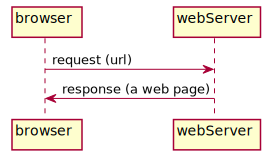

In [3]:
%%plantuml
@startuml
browser -> webServer:request (url)
webServer -> browser:response (a web page)
@enduml

## 1.3 uri

### 1.3.1 domain

* URI Uniform Resource Identifier 특정자원을 지칭하는 고유명사
* 형식
    * 
    ```
    scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
    ```
    * 로컬 html 파일보기 (file://host/path/to/html)
        * 위 URI 형식을 지켜서 페이지를 열어야 한다.
        * 한글은 meta charset을 utf-8로 지정한다.
    * 웹페이지 열어보기

* URI 가운데 가장 많이 쓰이는 것이 인터넷주소 url (Uniform Resource Locator)
    * scheme에 http를 적는다. 예: http://www.smu.ac.kr
    * 도메인 네임
        * 영어로 된 도메인네임은 사람이, 컴퓨터는 숫자로 된 ip 주소
        * DNS에서 ip주소로 변환한다.
    * 도메인에서 해야 할 일은 뒤에 params에서 설명


* local html

In [1]:
%%writefile src/mypage1.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Writing src/mypage1.html


* 로컬에 저장된 파일을 읽어오는 uri를 구성한다.
* 웹브라우저에서 파일을 열려면 시간이 좀 걸린다 (몇 초 정도)

In [1]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'src/mypage1.html')
webbrowser.open(myuri)
# uri형식을 지키지 않으면 안된다.
# webbrowser.open('mypage.html')

True

* 한글은 meta charset을 정의해 준다.

In [2]:
%%writefile src/mypage1.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>

</body>
</html>

Overwriting src/mypage1.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.

In [2]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 원격 url



In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.3.2 params

* query string은 다음과 같이 구성한다.
    ```
    http://example.com/over/there?name=ferret
    ```
* web form을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, field=value
    * 구분자는 & (또는 세미콜론 ;)
    ```
    field1=value1&field2=value2&field3=value3...
    ```

* 위 지도를 열 경우와 같이, 검색어를 '+'로 붙여 쓰기도 한다.

In [9]:
import urllib
params = urllib.urlencode({"a": 4, "b": 20, "c": 2016, "d": 6, "e": 30, "f": 2016, "s": "^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


* 구글 검색에서의 param
    ```
    https://www.google.co.kr/#q=python
    https://www.google.co.kr/search?q=python
    ```
* 'python tutorial'을 검색할 경우
    https://www.google.co.kr/#q=python+tutorial
    ```

* 주의 인터넷 인코딩
    * '#'은 '%23'으로 표현된다. (quote_plus 참조, ds_REST.ipynb)

In [12]:
import urllib
params = urllib.urlencode({"#q": "python tutorial"})
print params

%23q=python+tutorial


In [11]:
url = 'http://www.google.com/#q='
print url + urllib.quote_plus('python tutorial')

http://www.google.com/#q=python+tutorial


## 1.4 url 가져오기

### 1.4.1 HTTP Request(s)

```
GET /index.html HTTP/1.1
User-Agent: Mozilla/4.0 (compatible; MSIE5.01; Windows NT)
Host: www.example.com
Accept-Language: en-us
Accept-Encoding: gzip, deflate
Connection: Keep-Alive
```

### 1.4.2 HTTP Response(s)

* 예제
```
HTTP/1.1 200 OK
Date: Fri, 10 Mar 2017 11:00:00 GMT
Server: Apache/2.2.14 (Win32)
Last-Modified: Fri, 10 Mar 2017 12:00:00 GMT
Content-Length: 88
Content-Type: text/html
Connection: Closed
<html>
<body>
<h1>It works!</h1>
</body>
</html>
```

### 1.4.3 library

* urllib - handles opening and reading URLs
    * urllib vs urllib2 (py4inf 12장)
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) urllib.error로 나눔.
    * urllib2 can accept a Request object to set the headers for a URL request, urllib accepts only a URL. 
    * urllib provides the urlencode method which is used for the generation of GET query strings, urllib2 doesn't have such a function.
* httplib - handles http requests, urllib내부에서 사용하고 있슴.
* requests - web page가져오거나, API를 사용할 때. 아래는 서로 같은 기능을 한다.
    ```
    urllib2.urlopen(url).read()
    requests.get(url).text
    ```

* urllib2에서 페이지 가져오는 함수 urlopen()
* 사용하고 close()

In [5]:
import urllib2
response = urllib2.urlopen("https://www.python.org/")
html=response.read()
response.close()

* urllib2에 POST Request를 사용할 수 있다.

```
query_args = { 'q':'query string', 'foo':'bar' }
data = urllib.urlencode(query_args)
request = urllib2.Request(url, data)
response = urllib2.urlopen(request)
html = response.read()
```

* error의 이해
    * urllib2.HTTPError 또는 urllib2.URLError
    * error.code (참조 https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

코드 | 구분 | 예
-----|-----|-----
1xx | Informational | 
2xx | Success | 200 OK
3xx | Redirection | 
4xx | 클라이언트 오류 | 400 Bad Request, 404 Not Found
5xx | 서버 오류 | 500 Internal Server Error

* error의 처리
    * try, except


In [23]:
req = urllib2.Request('http://www.python.org/fish.html')

try:
    response=urllib2.urlopen(req)
except urllib2.HTTPError, e:
    print e.code, e.reason

if html is None:
    print("URL is not found")
else:
    print "html has something!"

404 OK
html has something!


## 1.5 Parsing

* 웹데이터는 '문자열'이다. 특정 tag를 추출하는 것이 매우 불편한다. <h1>...</h1>은 부등호문자,h,1으로 구성된 시작-끝 tag를 찾아야 한다.
* 문자열은 tag구조를 가지고 있지만, tag가 아니라 '문자열'이라서 tree구조를 만들어야 한다는 점에 유의한다.
* parsing을 하면, 이런 tag 요소를 분리하고, tree구조로 만들어 분석을 용이하게 할 수 있다.
* HTML DOM, XML, json은 tree 구조를 가지고, 특정 요소를 선택할 수 있다.
* 파싱단계
    * 단계1: 라이브러리를 사용할 수 있게 가져온다.
        ```
        import xml.etree.ElementTree as ET
        ```

    * 단계2: 페이지를 가져온다 (메모리에 있거나, 파일로 저장)
    * 단계3: 가져온 페이지를 파싱하고, 트리를 생성한다 (태그로 변환).
        ```
        tree=ET.parse('my.xml')
        ```

    * 단계4: 트리에서 필요한 요소를 정한다.
    * 단계5: 필요한 요소를 가져온다.
        * 'namespace' localname으로 가져옴.
        ```
        root=tree.getroot()
        root.getiterator():
        ```


* parsing 라이브러리
    * HTMLParser - parser <- comes with lxml
    * BeautifulSoup - Python으로 구현된 parser (does not support XPath expressions.)
    * curl - Terminal에서 사용하는 명령어
    * lxml - is written in C and thus faster than bs. xml and html parser
    * regex
    * scrapy
        * full framework
        * use pipelines
        * use for a big project. (for a small project, use requests,lxml or BeautifulSoup

구분 | 라이브러리 | 설명
-----|-----|-----
웹데이터 가져오기 | urllib, requests, curl | 웹페이지 열고, http request(s), http response(s)
웹데이터 파싱 | HTMLParser, BeautifulSoup, lxml, regex | 문자열 또는 xml, json을 파싱
프레임워크 | scrapy (java nutch, crawler4j) | 큰 프로젝트에 사용


In [2]:
import iplantuml

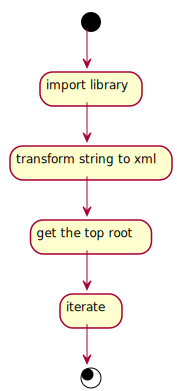

In [5]:
%%plantuml
@startuml
(*)--> "import library"
--> "transform string to tree"
--> "define selector"
--> "get selected elements of the tree"
-->(*)
@enduml

### 1.5.1 Javascript console

* 브라우저에서 Javascript

브라우저 | 콘솔창
-----|-----
Chrome | Tools > Developer Tools
Internet Explorer | F12
Firefox | Tools > Web Developer > Inspector
Safari | advanced preferences > enable Develop menu

* Chrome개발자 도구 사용하기 https://developers.google.com/web/tools/chrome-devtools/console/
    * xpath 또는 selector를 찾는 방법
        * Chrome을 열어서 > 보기 > 개발자정보 > 개발자도구 -> element
           * html tag를 누르면 맨 앞 ...가 생김
                * 이것을 누르면 팝업메뉴 > copy > xpath(또는 selector)
                
    * console 창에서 요소 선택

단축키 | 설명
-----|-----
\$x('xpath') | XPath와 일치하는 요소의 배열을 반환
\$('selector') | CSS 선택기와 일치하는 첫 번째 요소를 반환, document.querySelector()의 단축
\$$('selector all') | CSS 선택기와 일치하는 모든 요소의 배열을 반환, document.querySelectorAll()의 단축

### 1.5.2 dom

* HTML은 브라우저에서 tree구조로 변환된다. 이를 DOM (Document Object Model)이라고 한다.
* HTML, XHTML, XML 문서를 계층구조인 트리구조로 만들어, 각 노드를 오브젝트로 사용하는 API.
* dom에서의 css selector 특정 요소 선택해 보기
    * dom의 querySelector()를 사용한다.
        * 아래 '.my'라는 클래스를 선택한다.
    * dom의 getElementById()를 사용한다.
        * 아래 '.p2'라는 클래스를 선택한다.

In [5]:
%%HTML
<html>
<body>

<h2 class="my">Turn this into blue</h2>

<button onclick="myFunction()">Click</button>

<script>
function myFunction() {
    document.querySelector(".my").style.backgroundColor = "blue";
}
</script>

</body>
</html>

* HTML javascript DOM
    * style of a <p> element

In [20]:
%%HTML
<html>
<body>

<p id="p2">Hello World!</p>

<script>
document.getElementById("p2").style.color = "RED";
</script>

<p>Hello World turned into RED!</p>

</body>
</html>

### 1.5.3 BeautifulSoup

* 많이 사용되는 Python 라이브러리
* html, xml을 파싱할 수 있다.
* 이전 버전은 더 이상 지원되지 않으므로, 버전은 4로 한다.
    ```
    pip install beautifulsoup4
    ```
* 파서를 넣어주지 않으면 기본 파서를 사용한다.

파서 | 설정
-----|-----
Python html.parser | BeautifulSoup(markup, "html.parser")
lxml parser | BeautifulSoup(markup, "lxml")

* class 다음에는 _를 넣어 준다. 또는 key-value 형식으로 맞추어 준다.

In [5]:
from bs4 import BeautifulSoup
import requests
page = requests.get("https://www.python.org/")
soup = BeautifulSoup(page.content)
print soup.title
print soup.find_all('div',class_="do-not-print", id="top")

<title>Welcome to Python.org</title>
[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li cl

In [12]:
print soup.find_all('div',{'class': 'do-not-print','id':'top'})

[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li class="jobs-meta ">\n<a href="/jobs/" t

* a link의 href를 구할 수 있다.

In [11]:
for counter,link in enumerate(soup.find_all('a')):
    if(counter<20):
        print counter,link.get('href')

0 #content
1 #python-network
2 /
3 /psf-landing/
4 https://docs.python.org
5 https://pypi.python.org/
6 /jobs/
7 /community/
8 #top
9 /
10 #site-map
11 #
12 javascript:;
13 javascript:;
14 javascript:;
15 #
16 http://plus.google.com/+Python
17 http://www.facebook.com/pythonlang?fref=ts
18 http://twitter.com/ThePSF
19 /community/irc/


### 1.5.4 regex

* 정규식 regular expression은 문자열로 표현한 정규표현으로, 패턴매칭에 사용한다.
* 정규식을 사용하면 복잡한 패턴을 단순하게 처리


정규식 | 설명 | 예
-----|-----|-----
() | grouping | (\d{1,2})
\d | any character in the range 0-9 |
\s | any whitespace |
\w | any character in the range 0-9, A-Z, a-z |
[] | a signle character | [a-cx-z] = "a", "b", "c", "x", "y", or "z"
\- | range separator | [0123456789] = [0-9]
\* | the preceding element zero or more times | ab*c = "ac", "abc", "abbbc"
\+ | the preceding element one or more times  | ba+ = "ba", "baa", "baaa", and so on


In [11]:
import re

sentence="Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas"
regex1='\w+'
print "alphanumberic words: ",re.findall(regex1, sentence)
regex2='\d+'
print "numeric words: ",re.findall(regex2, sentence)
regex3 = '[A-Z]\w+'
print "any uppercase words: ",re.findall(regex3, sentence)
regex4 = '([A-Z]\w+)([A-Z]\w+)'
print "any uppercase words: ",re.findall(regex4, sentence)


alphanumberic words:  ['Here', 'goes', 'my', 'phone', 'number', '2287', '1111', 'Nice', 'to', 'meet', 'you', 'Merry', 'Christmas']
numeric words:  ['2287', '1111']
any uppercase words:  ['Here', 'Nice', 'Merry', 'Christmas']
any uppercase words:  []


* regex로 태그 찾기

In [8]:
import re

tags='<html><body><div>asdfasdf</div><p><a>foo</a></p></body></html>'
regex="<a>(.*)</a>"
print "a tag: ",re.findall(regex, tags)

a tag:  ['foo']


* BeautifulSoup에서 regex

In [17]:
from BeautifulSoup import BeautifulSoup
import re

htmlstr = """
<p>this is number 12345</p>
<p>this is text</p2>
"""

soup = BeautifulSoup(htmlstr)
for e in soup(text=re.compile(r'\d+')):
    print "tag: ", e.parent
    print "text: ", e

tag:  <p>this is number 12345</p>
text:  this is number 12345


### 1.5.5 xpath

* xml문서를 트리구조로 표현하고, 노드를 선택하기 위해 사용하는 조회언어 (XML Path Language)
* xpath 표현

Expression | 설명 | 예
---------|----------|----------
/ | root부터 선택 | /div 루트에 있는 div 선택
// | 어디에 있는지 상관없이 선택 | //div 문서에 있는 div 선택
. | Selects the current node | 
.. | Selects the parent of the current node | 
@ | Selects attributes | //@href 속성href를 가진 모든 노드
\* | all |
@* | 속성 모두 | //div[@*] 속성을 가지고 있는 모든 div

* xpath 사용예

xpath선택 | 결과
----------|----------
```$x('/html')``` | ```<html>...</html>```
```$x('/html/body')``` | ```<body>...</body>```
```$x('/html/body/div') 또는 $x('//div')``` | ```<div>...</div>```
```$x('/html/body/div/h1') 또는 $x('//div/h1')``` | ```<h1>Example Domain</h1>```
```$x('/html/body/div/p')``` | ```<p>...</p>, <p>...</p>```
```$x('/html/body/div/p[1]')``` | ```<p>...</p>```
```$x('/html/body/div/p[2]')``` | ```<p>...</p>```

#### 1.5.5.1 html 파싱

In [30]:
import xml.etree.ElementTree as ET
tree=ET.parse('mypage.html')
root=tree.getroot()
print root
for node in tree.getiterator():
    print node.tag, node.attrib

<Element 'html' at 0x7fc9190be1d0>
html {}
head {}
title {}
body {}
h1 {}
p {}
p {}


In [32]:
f=open('mypage.html')
htmlstr=f.read()
f.close()
tree=ET.fromstring(htmlstr)
for node in tree.getiterator():
    print node.tag, node.attrib

html {}
head {}
title {}
body {}
h1 {}
p {}
p {}


#### 1.5.5.2 xml 파싱
* 파일 확장자 .xml를 가진다.
* 태그로 구성된다. 시작태그와 끝태그 사이에 데이터를 넣는다.
* [위키에서 가져온 XML](https://en.wikipedia.org/wiki/XPath)

In [3]:
%%writefile my.xml
<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>

Writing my.xml


* 파일에서 직접 파싱

In [33]:
import xml.etree.ElementTree as ET
tree=ET.parse('my.xml')
root=tree.getroot()
print root

<Element 'wikimedia' at 0x7fc9190b4910>


* 반복은 tree 또는 root에서 해도 된다. 아래는 tree에서 for문을 반복한다.

In [34]:
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* 문자열에서 파싱 (파일에서 읽어온 내용을 문자열로 저장한 후)
    * 파일에서 읽어온 것은 '태그'가 아니라 '문자열'
    * 다시 말하면, 파싱이 완료된 '태그'가 아니라, 파싱을 해야 하는 '문자열'

In [35]:
f=open('my.xml')
xmlstr=f.read()
f.close()

In [4]:
print type(xmlstr)

<type 'str'>


In [5]:
print xmlstr

<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


In [36]:
import xml.etree.ElementTree as ET
tree=ET.fromstring(xmlstr)
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* lxml을 사용한다.
    * xml라이브러리는 xpath를 지원하지 않는다.
    * 실행하는 단계는 다른 라이브러리를 사용하는 단계와 다르지 않다.


* 파일을 파싱하기

In [37]:
import lxml
import lxml.etree

tree=lxml.etree.parse('my.xml')
root=tree.getroot()

* lxml 라이브러리에서 문자열을 파싱할 때는 StringIO를 사용한다.
    * xml 라이브러리에서는 fromstring()함수를 사용했다.

In [38]:
import StringIO
tree=lxml.etree.parse(StringIO.StringIO(xmlstr))

In [17]:
for node in tree.getiterator():
    print node.tag, node.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* iterator를 사용할 수 있다.

In [19]:
treeiter=lxml.etree.iterparse(StringIO.StringIO(xmlstr))

In [20]:
type(treeiter)

lxml.etree.iterparse

In [21]:
for action, elem in treeiter:
    if not elem.text:
        text="None"
    else:
        text=elem.text
    print elem.tag+"=>"+text

edition=>en.wikipedia.org
edition=>de.wikipedia.org
edition=>fr.wikipedia.org
edition=>pl.wikipedia.org
edition=>es.wikipedia.org
editions=>
        
project=>
      
edition=>en.wiktionary.org
edition=>fr.wiktionary.org
edition=>vi.wiktionary.org
edition=>tr.wiktionary.org
edition=>es.wiktionary.org
editions=>
        
project=>
      
projects=>
    
wikimedia=>
  


* xpath
    * /wikimedia/projects/project/@name
        * /Wikimedia/projects/project/@name
    * //editions
    * /wikimedia/projects/project/editions/edition[@language='English']/text()
        * text of all edition elements where language attribute is equal to English).
    * /wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()
        * text of all edition elements that exist under project element with a name attribute of Wikipedia

In [39]:
nodes = tree.xpath("/wikimedia/projects/project/@name")
print len(nodes)

2


In [62]:
for node in nodes:
    print node

Wikipedia
Wiktionary


In [23]:
nodes = tree.xpath("//editions/edition/text()")
print len(nodes)

10


In [24]:
for node in nodes:
    print node

en.wikipedia.org
de.wikipedia.org
fr.wikipedia.org
pl.wikipedia.org
es.wikipedia.org
en.wiktionary.org
fr.wiktionary.org
vi.wiktionary.org
tr.wiktionary.org
es.wiktionary.org


In [64]:
nodes = tree.xpath("/wikimedia/projects/project/editions/edition[@language='English']/text()")
print len(nodes)

2


In [65]:
for node in nodes:
    print node

en.wikipedia.org
en.wiktionary.org


In [66]:
nodes = tree.xpath("/wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()")
print len(nodes)

5


In [67]:
for node in nodes:
    print node

en.wikipedia.org
de.wikipedia.org
fr.wikipedia.org
pl.wikipedia.org
es.wikipedia.org


### 1.5.6 css selectors

* CSS는 html의 스타일을 정하는 규칙을 가지고 있다. css selector는 첫 '{' 앞에 오는 selector로서 규칙이 적용되는 범위를 정한다.

* [css selectors](http://www.w3schools.com/cssref/css_selectors.asp)
    * text()함수를 사용해서 inline 문자를 가져올 수 있다. 예: $x('//a/text()')

type of selector | example | 설명 | xpath
------------|------------|------------|------------
[attribute] | $$('input[type="email"]') | | $x('//input[@type="email"]')
type | 'div'<br>'a' | div 태그<br>a 태그 | '//div'<br>'//a'
class | '.foo' | class 속성이 foo를 선택 | '//*[@class="divclass"]'
id | '#divid' | id foo (1개만 선택. 클래스는 여러 개 선택) | '//*[@id="divid"]'
universal | '*' | all | '//*'
descendents | 'div a' | all a's inside div (여러 세대 떨어져도 선택) | //div//a' 
child | 'div > a' | a's only children to the div (1세대 다음) | //div/a
parents | a ~ b | any parents of b (여러 세대 위)
grouped | 'h1, h2' | 'h1 h2' |
text | a:link | 선택한 노드, element의 text | text()

* 설치
    ```
    sudo apt-get install libxml2-dev libxslt1-dev
    pip install lxml cssselect
    ```

* chrome console에서는 $$('selector')

#### 1.5.6.1 css

In [1]:
%%writefile src/mypage2.html
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>My Home Page</title>
    <style>
        h1 {
            text-align: center;
            color:red;
            font-family: 'Droid Sans', sans-serif;
        };  
    </style>
</head>
<body>
    <h1>안녕하십니까</h1>
    <p>오늘은 프로그래밍 하는 날...</p>
    <p>Today we do programming...</p>

    <div id="divid">
        <h2>Hello h2</h2>
        <p>Here we use div id.</p>
        <a href="https://www.example.com">Visit example.com</a>
    </div>
    <div class="divclass">
        <h2>Welcome</h2>
        <p>Here we use div class.</p>
        <ul>
            <li>first</li>
            <li>second</li>
        </ul>
    </div>

    <form action="">
    Email <input type="email" value="emailvalue" name="emailname" id="emailid"
        class="emailclass" style="background-color: green;"required>
    Zip Code <input type="number" name="zipname" required>
    <textarea rows="4" columns="50"></textarea>
    <input type="submit" value="Submit">
    </form>
</body>
</html>

Overwriting src/mypage2.html


In [3]:
%%html
    <h1>안녕하십니까</h1>
    <p>오늘은 프로그래밍 하는 날...</p>
    <p>Today we do programming...</p>

    <div id="divid">
        <h2>Hello h2</h2>
        <p>Here we use div id.</p>
    </div>
    <div class="divclass">
        <h2>Welcome</h2>
        <p>Here we use div class.</p>
        <a href="https://www.example.com">Visit example.com</a>
    </div>

    <form action="">
    Email <input type="email" value="emailvalue" name="emailname" id="emailid"
        class="emailclass" style="background-color: green;"required>
    Zip Code <input type="number" name="zipname" required>
    <textarea rows="4" columns="50"></textarea>
    <input type="submit" value="Submit">
    </form>

In [82]:
htmlstr='''<form action="">
    Email <input type="email" value="email" name="email" id="email"
        class="input_email" style="background-color: green;">
    <textarea rows="4" columns="50"></textarea>
</form>
'''

In [84]:
import lxml
import StringIO

parser=lxml.etree.HTMLParser()
tree=lxml.etree.parse(StringIO.StringIO(htmlstr),parser)

In [89]:
# construct a CSS Selector -> 
from lxml.cssselect import CSSSelector
sel = CSSSelector('#email')
# Apply the selector to the DOM tree.
nodes = sel(tree)
print type(nodes),len(nodes)
for e in nodes:
    print e.text

<type 'list'> 1
None


#### 1.5.6.2 xml

* 위에서 만들어 놓은 ElementTree객체를 사용한다.
* css selector의 결과는 list이다.

In [22]:
type(tree)

lxml.etree._ElementTree

In [23]:
import lxml.html
from lxml.cssselect import CSSSelector

# construct a CSS Selector -> 
sel = CSSSelector('wikimedia')
# Apply the selector to the DOM tree.
nodes = sel(tree)
print type(nodes),len(nodes)

<type 'list'> 1


In [25]:
for node in nodes:
    print lxml.html.tostring(node)

<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


#### 1.5.6.3 html

In [24]:
htmlstr="""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>"""

In [25]:
import lxml.html
from lxml.cssselect import CSSSelector

_html = lxml.html.fromstring(htmlstr)

In [26]:
print lxml.html.tostring(_html)

<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>&#50504;&#45397;&#54616;&#49901;&#45768;&#44620;</h1>
<p>&#50724;&#45720;&#51008; &#54532;&#47196;&#44536;&#47000;&#48141; &#54616;&#45716; &#45216;...</p>
<p>Today we do programming...</p>
</body>
</html>


In [27]:
sel = CSSSelector('body  p')
nodes = sel(_html)
print nodes

[<Element p at 0x7fc9190a30a8>, <Element p at 0x7fc9190a3788>]


In [28]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...
Today we do programming...


* chrom javascript console에서 selector를 복사해서 사용한다.
* nth-child(2)는 특정 child를 선택한다.

In [31]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > p:nth-child(2)')
nodes = sel(_html)
print nodes

[<Element p at 0x7f5357ff1db8>]


In [32]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...


In [34]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > h1')
nodes = sel(_html)
print nodes

[<Element h1 at 0x7f5357ff9730>]


In [35]:
for node in nodes:
    print node.text

안녕하십니까


## 웹데이터-1: python.org 페이지를 크롤링해서 http url 출력하기

* 정적인 페이지 가져오기
* 사용자가 웹브라우저 주소창에 url을 입력하고 웹페이지 요청

* urllib2.urlopen 
    * GET 또는 POST 방식으로 원격 url (html, 이미지, 파일 등)을 연다.
* 다음 방식으로 해 본다.
    * regex
    * BeautifulSoup
    * xpath
    * css selector

### html page 가져오기

* Python.org페이지를 가져온다. urllib을 사용해서 response로 받는다.
* 그 길이는 47,408이다.
* 웹페이지는 html 문자열, 즉 string, unicode이다.
    * 문자열이므로, html태그 역시 parsing하기 전에는 문자일 뿐이다.

In [4]:
import urllib
response = urllib.urlopen('http://python.org/')
_html = response.read()
print len(_html)

47410


In [48]:
print type(_html)

<type 'str'>


* response의 정보를 읽을 수 있다.
    * 앞서 47,408 길이도 확인할 수 있다.

In [3]:
print response.info()

Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: SAMEORIGIN
X-Clacks-Overhead: GNU Terry Pratchett
Content-Length: 47408
Accept-Ranges: bytes
Date: Thu, 09 Mar 2017 05:39:15 GMT
Via: 1.1 varnish
Age: 540
Connection: close
X-Served-By: cache-nrt6130-NRT
X-Cache: HIT
X-Cache-Hits: 15
X-Timer: S1489037955.868861,VS0,VE0
Vary: Cookie
Public-Key-Pins: max-age=600; includeSubDomains; pin-sha256="WoiWRyIOVNa9ihaBciRSC7XHjliYS9VwUGOIud4PB18="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="lCppFqbkrlJ3EcVFAkeip0+44VaoJUymbnOaEUk7tEU="; pin-sha256="TUDnr0MEoJ3of7+YliBMBVFB4/gJsv5zO7IxD9+YoWI="; pin-sha256="x4QzPSC810K5/cMjb05Qm4k3Bw5zBn4lTdO/nEW/Td4=";
Strict-Transport-Security: max-age=63072000; includeSubDomains



### regex

In [5]:
import re
#p=re.compile('http://.+"')
p=re.compile('href="(http://.*?)"')
nodes=p.findall(_html)
print "http url은 몇 개?",len(nodes)
for i, node in enumerate(nodes):
    print i, node

http url은 몇 개? 44
0 http://www.ie6countdown.com/
1 http://browsehappy.com/
2 http://www.google.com/chromeframe/?redirect=true
3 http://plus.google.com/+Python
4 http://www.facebook.com/pythonlang?fref=ts
5 http://twitter.com/ThePSF
6 http://brochure.getpython.info/
7 http://wiki.python.org/moin/Languages
8 http://python.org/dev/peps/
9 http://planetpython.org/
10 http://pyfound.blogspot.com/
11 http://pycon.blogspot.com/
12 http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator
13 http://blog.python.org
14 http://feedproxy.google.com/~r/PythonInsider/~3/w2AW2NRSOEM/python-361rc1-is-now-available-for.html
15 http://feedproxy.google.com/~r/PythonInsider/~3/NeIHRAidlpc/python-353-and-346-are-now-available.html
16 http://feedproxy.google.com/~r/PythonInsider/~3/UoiMThSwgQM/python-353rc1-and-python-346rc1-are-now.html
17 http://feedproxy.google.com/~r/PythonInsider/~3/4gOtq8ChYHk/python-360-is-now-available.html
18 http://feedproxy.google.com/~r/PythonInsider/~3/LL

* regex를 사용해서 태그 값을 가져오기
    * library를 사용하면 보다 간편하게 가져올 수 있지만, 배운 regex를 이용해보자.
    * h1 태그
    * p 태그

In [4]:
import re
p=re.compile('<h1>(.*?)</h1>')
h1tags=p.findall(_html)
for tag in h1tags:
    print tag

Functions Defined
Compound Data Types
Intuitive Interpretation
Quick &amp; Easy to Learn
All the Flow You&rsquo;d Expect


In [4]:
import re
p=re.compile('<p>(.*?)</p>')
ptags=p.findall(_html)

In [3]:
print len(ptags)

18


In [5]:
print ptags[0]

<strong>Notice:</strong> While Javascript is not essential for this website, your interaction with the content will be limited. Please turn Javascript on for the full experience. 


In [6]:
#for i in ptags:
    #print i

### BeautifulSoup

* 태그를 파싱하는 라이브러리
* 설치
    * 윈도우 아나콘다창 또는 맥/리눅스 Terminal에서
    
    ```sudo pip install BeautifulSoup```
* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기


In [42]:
from bs4 import BeautifulSoup
tree=BeautifulSoup(_html, "lxml")
strongtags=tree('strong')
for tag in strongtags:
    print tag

<strong>Notice:</strong>
<strong><small>A</small> A</strong>
<strong>relaunched community-run job board</strong>


* 파서parser를 추가한다. lxml이 기본 파서로 사용된다.
* 20개만 출력한다. 전체 개수는 맨 마지막 줄에 출력한다.

In [15]:
from urllib import urlopen
from bs4 import BeautifulSoup
_html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
tree = BeautifulSoup(_html, "lxml")
counter=0
for link in tree.findAll("a"):
    if 'href' in link.attrs:
        if counter<20:
            print counter, link.attrs['href']
        counter+=1
print "Total: ", counter

0 /wiki/Wikipedia:Protection_policy#semi
1 #mw-head
2 #p-search
3 /wiki/Kevin_Bacon_(disambiguation)
4 /wiki/File:Kevin_Bacon_SDCC_2014.jpg
5 /wiki/San_Diego_Comic-Con
6 /wiki/Philadelphia
7 /wiki/Pennsylvania
8 /wiki/Kyra_Sedgwick
9 /wiki/Sosie_Bacon
10 /wiki/Edmund_Bacon_(architect)
11 /wiki/Michael_Bacon_(musician)
12 http://baconbros.com/
13 #cite_note-1
14 #cite_note-actor-2
15 /wiki/Footloose_(1984_film)
16 /wiki/JFK_(film)
17 /wiki/A_Few_Good_Men
18 /wiki/Apollo_13_(film)
19 /wiki/Mystic_River_(film)
Total:  788


### xpath, css selector를 Chrom javascript console에서 확인해보자.

* xpath
    ```
    $x('//*[@href]')
    ```
* css select
    ```
    $$('a[href]')
    ```

### xpath로 해보기

* lxml로 html을 파싱해서 자료 가져오기 (위에서 읽어온 html 변수를 사용)

In [61]:
print len(_html)

47423


In [10]:
from lxml import etree
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")

In [9]:
print len(result)

47357


In [11]:
nodes = _htmlTree.xpath('//*[@href]')
print len(nodes)

207


In [12]:
for i, node in enumerate(nodes):
    if i<20:
        print i, node.attrib

0 {'href': '//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js', 'rel': 'prefetch'}
1 {'href': '/static/stylesheets/style.css', 'type': 'text/css', 'rel': 'stylesheet', 'title': 'default'}
2 {'media': 'not print, braille, embossed, speech, tty', 'href': '/static/stylesheets/mq.css', 'type': 'text/css', 'rel': 'stylesheet'}
3 {'href': '/static/favicon.ico', 'type': 'image/x-icon', 'rel': 'icon'}
4 {'href': '/static/apple-touch-icon-144x144-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '144x144'}
5 {'href': '/static/apple-touch-icon-114x114-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '114x114'}
6 {'href': '/static/apple-touch-icon-72x72-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '72x72'}
7 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon-precomposed'}
8 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon'}
9 {'href': '/static/humans.txt', 'rel': 'author'}
10 {'h

### css selector

In [13]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://python.org/')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('a[href]')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [15]:
print len(nodes)
for i,node in enumerate(nodes):
    #print lxml.html.tostring(item)
    if i<20:
        print i, node.get('href'), node.text

197
0 #content Skip to content
1 #python-network 
                    
2 / Python
3 /psf-landing/ PSF
4 https://docs.python.org Docs
5 https://pypi.python.org/ PyPI
6 /jobs/ Jobs
7 /community/ Community
8 #top 
                    
9 / None
10 #site-map None
11 # None
12 javascript:; Smaller
13 javascript:; Larger
14 javascript:; Reset
15 # Socialize
16 http://plus.google.com/+Python None
17 http://www.facebook.com/pythonlang?fref=ts None
18 http://twitter.com/ThePSF None
19 /community/irc/ None


## 웹데이터-2: 웹파일을 가져와서 자료구조에 넣기

* uci 기계학습 데이터 파일 읽기
* 로컬 파일을 읽는 것과 비교
* 전체 문자 수는 25,437
* 데이터는 300행 x 28열

In [2]:
import urllib2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
res=urllib2.urlopen(url)
html = res.read()
res.close()
print len(html)

25437


In [30]:
lines=html.splitlines()
data=[]
for line in lines:
    data.append(line.split())
print len(data), len(data[0])
print data[0]

300 28
['2', '1', '530101', '38.50', '66', '28', '3', '3', '?', '2', '5', '4', '4', '?', '?', '?', '3', '5', '45.00', '8.40', '?', '?', '2', '2', '11300', '00000', '00000', '2']


### 데이터 확인

* 모든 300행에대해 28개 컬럼이 있는지
* 처음 20개만 3번째 컬럼 평균내보기

In [56]:
for i in range(0,len(data)):
    if len(data[i]) != len(data[0]):
        print "wrong size at", i

In [57]:
for i in range(0,20):
    print data[i][3]

38.50
39.2
38.30
39.10
37.30
?
37.90
?
?
38.30
38.10
39.10
37.20
38.00
38.2
37.60
?
37.50
37.60
39.4


In [52]:
sum=0
cnt=0
for i in range(0,20):
    val=data[i][3]
    if val is '?':
        print i,"None"
    else:
        sum+=float(val)
        cnt+=1
        print i,val, sum
average=float(sum/cnt)
print "count={0} sum={1} average={2:2.2f}".format(cnt,sum,average)

0 38.50 38.5
1 39.2 77.7
2 38.30 116.0
3 39.10 155.1
4 37.30 192.4
5 None
6 37.90 230.3
7 None
8 None
9 38.30 268.6
10 38.10 306.7
11 39.10 345.8
12 37.20 383.0
13 38.00 421.0
14 38.2 459.2
15 37.60 496.8
16 None
17 37.50 534.3
18 37.60 571.9
19 39.4 611.3
count=16 sum=611.3 average=38.21


## 웹데이터-3: wiki에서 'python'으로 검색해서 http url 출력하기

* 앞 문제에서는 정적 페이지를 읽었고, 여기서는 검색어를 사용한 request
* urllib을 사용해서 처리하면 오류, 웹브라우저를 열어서 하면 ok
* 이유는 header를 설정하지 않아서 그렇다.

In [58]:
from urllib import urlopen
keyword='python'
resp = urlopen('https://www.google.com/search?q='+keyword)
html=resp.read()
len(html)

5503

In [59]:
import re
p=re.compile('.*(error).*')
print p.search(html).group(1)

error


In [61]:
import webbrowser
webbrowser.open('http://www.google.com/search?q=python')

True

### headers

* user agent
    * Python에서 사용하는 기본 User Agent 방식은 'a User-Agent header of urllib/VVV' (urllib 버전코드)
    * urllib 1.17을 사용하면 'Python-urllib/1.17'
    * 이런 User Agent를 사용하면 에러가 발생할 수 있슴. 헤더를 보고 Python 프로그램으로 크롤링한다고 판단해 거절.

* 형식
    ```Mozilla/[version] ([system and browser information]) [platform] ([platform details]) [extensions]```
    * Safari on the iPad
    ```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B40```
    * Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
    * (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
    * AppleWebKit/531.21.10: The platform the browser uses.
    * (KHTML, like Gecko): Browser platform details.
    * Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.
* user agent 확인
https://www.whatismybrowser.com/detect/what-is-my-user-agent

* 리눅스 Firefox의 User Agent 예
```Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0```

* 맥 Safari의 User Agent 예
```Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7```


In [17]:
# 파이썬에서 사용하는 기본 User Agent
from urllib import URLopener
URLopener.version

'Python-urllib/1.17'

In [7]:
import requests

resp = requests.head("http://www.google.com")
print "status=",resp.status_code
print "response text=", resp.text
print "response header=", resp.headers

status= 302
response text= 
response header= {'Date': 'Fri, 03 Mar 2017 06:47:30 GMT', 'Content-Length': '261', 'Content-Type': 'text/html; charset=UTF-8', 'Location': 'http://www.google.co.kr/?gfe_rd=cr&ei=ghG5WJTVHaff8AfthbLgBA', 'Cache-Control': 'private'}


* 구글 검색엔진에서
```
https://www.google.co.kr/search?q=python
```

In [13]:
import urllib2
url = 'http://www.google.com/#q=python'
headers = {'User-Agent' : 'Mozilla 5.0'}
request = urllib2.Request(url, None, headers)
response = urllib2.urlopen(request)
print response.headers

Date: Fri, 03 Mar 2017 07:01:07 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=UTF-8
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=98=FE3iQZg1DDOP3r0xDhj5bmvAd-ms4MPTuwx_gyzldfWM6oy48xJ2HqPYOzFmR8rxRV4lBWKdOikX951hp5JhxS2bpEP-Kqm8Szr0DQo1Sq29g9dzR1RF9hemoD77jxG9; expires=Sat, 02-Sep-2017 07:01:07 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close



In [46]:
import urllib2
class HeadRequest(urllib2.Request):
     def get_method(self):
         return "HEAD"

response = urllib2.urlopen(HeadRequest("http://google.com/index.html"))
print response.info()
print response.geturl()

Date: Sat, 17 Sep 2016 11:55:22 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=EUC-KR
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=86=Q13BVpGI56Z55G9bCM64OCG0aKj7Rw3H8F-xj-vt1R3WkUW4lKXeKbBaHQwH6nbnPeo5OsKAijPw0d7wD1NzNFFVDHkznuusIegItoGoVexDaJpj2IFK2DglzvaewY2a; expires=Sun, 19-Mar-2017 11:55:22 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close

http://www.google.co.kr/index.html?gfe_rd=cr&ei=Ki_dV6yADofR8gfvoYO4BQ


* defining my own UA

In [15]:
# 연습으로 자신의 User Agent 설정
from urllib import FancyURLopener
class MyOpener(FancyURLopener):
    version = 'My new User-Agent'
MyOpener.version

'My new User-Agent'

In [16]:
# 리눅스 Firefox User Agent 예
# 맥 Safari User Agent 예
class MyOpener(FancyURLopener):
    #version = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'
    version = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'
MyOpener.version

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'

In [50]:
myopener = MyOpener()
page = myopener.open('http://www.google.com/search?q=python')
html=page.read()

In [51]:
import os
f=open('mygoogle.html','w')
f.write(html)
f.close()
import webbrowser
mygoogle='file://'+'localhost'+os.path.join(os.getcwd(), 'mygoogle.html')
print mygoogle
webbrowser.open(mygoogle)

file://localhost/home/jsl/Code/git/bb/jsl/pyds/mygoogle.html


True

* http로 하면 결과가 없다.
    ```
    p=re.compile('href="(http://.*?)"')
    ```

In [52]:
import re

p=re.compile('href="(https://.*?)"')
#p=re.compile('.*href.*')
res=p.findall(html)
print len(res)
for item in res:
    print item[:100]

50
https://www.google.co.kr/intl/ko/options/
https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.k
https://www.google.com/url?q=/chrome/browser/desktop/index.html%3Fhl%3Dko%26brand%3DHLDY%26utm_sourc
https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwiPrpScrJbPAhUBX5QKHZLSDg4QPAgD
https://www.python.org/
https://www.python.org/
https://www.python.org/
https://webcache.googleusercontent.com/search?q=cache:Fvb7Gz_c4rwJ:https://www.python.org/+&amp;cd=2
https://translate.google.co.kr/translate?hl=ko&amp;sl=en&amp;u=https://www.python.org/&amp;prev=sear
https://www.python.org/downloads/
https://www.python.org/about/gettingstarted/
https://www.python.org/doc/
https://docs.python.org/
https://www.python.org/downloads/windows/
https://wiki.python.org/moin/BeginnersGuide
https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC
https://webcache.googleusercontent.com/search?q=cache:OL25IRr7kSMJ:https://ko.wikipedia.org/wiki/%25
https://wi

In [ ]:
import urllib2
import urllib
googleurl = 'https://www.google.com/search'
keyValues = {'q' : 'python programming tutorials'}
request = urllib.urlencode(keyValues)
print request
request = request.encode('utf-8') # data should be bytes

In [56]:
req = urllib2.Request(googleurl+'?'+request)
print req

print req.get_full_url()

print req.get_method

<urllib2.Request instance at 0x7f0847d66320>
https://www.google.com/search?q=python+programming+tutorials
<bound method Request.get_method of <urllib2.Request instance at 0x7f0847d66320>>


* forbidden error

In [ ]:
resp = urllib2.urlopen(req)
resp = myopener.open(req)
html = resp.read()

### wiki에서 읽기

In [14]:
import urllib
keyword='Albert_Einstein'
keyword='Python (programming language)'
s = urllib.urlopen('http://en.wikipedia.org/w/index.php?action=raw&title='+keyword).read()
#print s.find('Python is a widely used general-purpose')
print s[:5000]


{{About|the programming language|the genus and other uses|Python (disambiguation)}}
{{Use dmy dates|date=August 2015}}
{{Infobox programming language
|name                   = Python
|logo                   = Python logo and wordmark.svg
|logo_size              = 260px
|paradigm               = [[multi-paradigm programming language|multi-paradigm]]: [[object-oriented programming|object-oriented]], [[imperative programming|imperative]], [[functional programming|functional]], [[procedural programming|procedural]], [[reflective programming|reflective]]
|year                   = {{Start date and age|df=yes|1991}}
|designer               = [[Guido van Rossum]]
|developer              = [[Python Software Foundation]]
|latest_release_version = 3.5.0 /<br>{{Start date|df=yes|2015|09|13}}<ref>{{cite web |url=https://docs.python.org/3/whatsnew/3.5.html |title=Python 3.5.0 |publisher=Python Software Foundation |accessdate=13 September 2015}}</ref><br>2.7.10 /<br>{{Start date|df=yes|2015|05|23}}<r

### 위키에서 css.selector

In [26]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests

r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
# build the DOM Tree
tree = lxml.html.fromstring(r.text)
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

* Chrome javascript console > 태그 하이라이트 > '...'에서 오른쪽 버튼 > copy > copy selector

In [27]:
sel = CSSSelector('#mw-content-text > div:nth-child(1)')
# Apply the selector to the DOM tree.
results = sel(tree)
print results

[<Element div at 0x7f084c6a54c8>]


In [34]:
# print the HTML for the first result.
match = results[0]
print lxml.html.tostring(match)

<div role="note" class="hatnote">This article is about the programming language. For the genus and other uses, see <a href="/wiki/Python_(disambiguation)" class="mw-redirect mw-disambig" title="Python (disambiguation)">Python (disambiguation)</a>.</div>



In [36]:
# print the text of the first result.
print match.text

This article is about the programming language. For the genus and other uses, see 


In [44]:
for result in results:
    print result.text

This article is about the programming language. For the genus and other uses, see 


## 웹데이터-4: 한국 포털사이트에서 노래제목을 검색

* naver에서 가져오기
* regex, css selector

### regex

In [9]:
import urllib
keyword='비오는'
f = urllib.urlopen("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
mydata = f.read();

In [10]:
pos = mydata.find("트랙 리스트")
if (pos>0):
    pos = mydata.find("_title title NPI=", pos);
    pos = mydata.find("title=",pos+20)
    pos2 = mydata.find("\"", pos+8)
    print "---",mydata[pos+7:pos2]
print len(mydata)

--- 비 오는 거리
131067


In [11]:
import re
p=re.compile('title=".*비.?오는.*"')
#res=p.search(data)
res=p.findall(mydata)
for item in res:
    print item

title="검색어 입력" value="비오는" maxlength="50" accesskey="s"
title="비오는날" alt="비오는날"
title="비오는 금요일" alt="비오는 금요일"
title="비 오는 거리" ><span class="ellipsis"
title="1집 비오는 거리" class="_album NPI=a:album,r:1,i:682"><span class="ellipsis"
title="비오는 날 수채화" ><span class="ellipsis"
title="비오는 날 수채화 1 OST" class="_album NPI=a:album,r:2,i:33001"><span class="ellipsis"
title="비 오는 날" ><span class="ellipsis"
title="비 오는 날" class="_album NPI=a:album,r:3,i:656486"><span class="ellipsis"
title="비오는날 (동요) (멜로디 MR)" ><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="비오는 밤에" ><span class="ellipsis"
title="비오는 날 (Inst.)" ><span class="ellipsis"
title="비오는 날" class="_album NPI=a:album,r:7,i:649010"><span class="ellipsis"
title="비오는 남산" ><span class="ellipsis"
title="비 오는 거리  (Feat. 핫펠트)" ><span class="ellipsis"
title="비오는 압구정" ><span class="ellipsis"
title="비오는 날은 푸르다" ><span class="ellipsis"
title="비오는 날은 푸르다" class="_album NPI=a:album,r:11,i:660894"><span class="ellipsis"
title="김현주의 비오는 거

### css selector

* selector 1: 맨 처음부터 가면
    * 위부터 따라가면
        ```
        body > #wrap > div.fix_conts > #container > .container_inner > #content
        ```
    * 다음 계속 이어가면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name
        ```
    * 제목까지 읽으면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name > a.title
        ```
     * 주요 selector 설명

CSS selectors | 설명
----------|----------
#content | id가 content인 element를 선택
#content > div:nth-child(4)' | 상위 #content의 4번째 div를 선택
div._tracklist_mytrack | div아래 _tracklist_mytrack 클래스를 선택

* selector 2: 앞은 건너뛰고 table부터 쓰면 (중간부터 쓰니까, 속성을 사용해서 시작함)
    ```
    'table[summary] > tbody > ._tracklist_move > .name > a.title'
    ```
    
    * selector 설명

CSS selectors | 설명
----------|----------
table[summary] | table summary 선택
a.title | a link의 title을 선택


#### 전체 css selector 사용하기

* 제목 1개 출력하기

In [12]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr:nth-child(2) > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [13]:
len(nodes)

1

In [14]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리


* 모든 제목 출력하기

In [15]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비 오는 날
비오는날 (동요) (멜로디 MR)
비오는 거리
비오는 밤에
비오는 날 (Inst.)
비오는 남산
비 오는 거리  (Feat. 핫펠트)
비오는 압구정
비오는 날은 푸르다
One More Time
비 오는 날의 수채화
Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`)
비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식)


#### 일부 css selector 사용하기

In [16]:
import lxml.html
import requests

keyword='비오는'
r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")

_html = lxml.html.fromstring(r.text)

* html을 보려면
    * r.text로 보거나
    * lxml.html.tostring(_html)

In [11]:
len(lxml.html.tostring(_html))

149317

In [17]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move > .name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(_html)

In [18]:
len(nodes)

15

* item.text()는 한글 문자 출력 오류
* item.text_content()를 사용해서 출력

In [19]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비 오는 날
비오는날 (동요) (멜로디 MR)
비오는 거리
비오는 밤에
비오는 날 (Inst.)
비오는 남산
비 오는 거리  (Feat. 핫펠트)
비오는 압구정
비오는 날은 푸르다
One More Time
비 오는 날의 수채화
Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`)
비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식)


* 곡명, 아티스트, 앨범 모두 가져오기
    * html이 정형적이지 않아서 어렵다.
    * 2단계 작업.
        * 곡명, 아티스트, 앨범 항목을 가지고 있는 상위 태그를 먼저 선정하고, 그 안의 개별 항목을 선정한다.

In [20]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)
print lxml.html.tostring(nodes[0])

<tr class="_tracklist_move {TRACK_TYPE}" style="display:none;" trackdata="{TRACK_DATA}">


						
							<td class="chk"><input type="checkbox" title="&#49440;&#53469;" class="_chkbox_item input_chk {TRACK_CHECK_NCLICKS}"> </td>
						
						
							<td class="order">{TRACK_NUM}</td>
						
							<td class="name">

								{PLAY_TOGGLE}
								{ADD_TOGGLE}


								<span class="_ico_title ico_title"><img height="18" width="23" alt="TITLE" src="http://static.naver.net/nmusic/201008/blank.gif"></span>
								<span class="_ico_19 ico19"><img height="18" width="13" src="http://static.naver.net/nmusic/201008/blank.gif"></span>


								{TRACK_SONG_NAME}

							</td>

							<td class="_artist artist {NO_ELL}">


                                   {ARTIST}

							</td>

						
                            <td class="album">
                                {ALBUM}
                            </td>
                        
                        
                        	<td class="like

* 개별 항목의 선정
* 우선 1개씩 해 본다.
    * results[0]은 제목행이므로, 그 다음을 처리한다.
    * 태그가 정형적이지 않으므로, selector가 일정하지 않다는 점에 주의한다.
        * Chrome console창을 이용해서 하나씩 작업하므로, selector를 정의하는데 노력이 수반된다.

In [21]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
_name=_selName(nodes[1])
_artist=_selArtist(nodes[1])
_album=_selAlbum(nodes[1])

In [22]:
print _name[0].text_content()
print _artist[0].text_content().strip()
print _album[0].text_content()

비 오는 거리
이승훈
1집 비오는 거리


* 반복문을 이용하여 모든 노래를 출력한다.
    * if문은 노래제목이 있는 없는 경우 제거한다 (제목 행을 제거하는 효과)

In [23]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


이승훈 --- 비 오는 거리 --- 1집 비오는 거리
강인원 --- 비오는 날 수채화 --- 비오는 날 수채화 1 OST
오소연 --- 비 오는 날 --- 비 오는 날
동요시대 --- 비오는날 (동요) (멜로디 MR) --- 동요 MR반주 5
서영은 --- 비오는 거리 --- 1집 Romantic 1
루드 페이퍼(Rude Paper) --- 비오는 밤에 --- 1집 Paper Spectrum
김민우 --- 비오는 날 (Inst.) --- 비오는 날
조영순 --- 비오는 남산 --- 무진장 트롯트 골든 1＆2
베이빌론(Babylon) --- 비 오는 거리  (Feat. 핫펠트) --- BETWEEN US
브라운 아이즈 --- 비오는 압구정 --- 2집 Reason 4 Breathing?
하이니(Hi.ni) --- 비오는 날은 푸르다 --- 비오는 날은 푸르다
Richard Marx --- One More Time --- 김현주의 비오는 거리
SG 워너비 --- 비 오는 날의 수채화 --- Classic Odyssey
Romantisch Jazzkapelle --- Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`) --- 뉴에이지 연가 : 비 오는 날의 거리, 추억, 그리고 아름다운 재즈 피아노(Pop 올드 팝, 클래식, 영화 OST 베스트 연주 음악)
강윤식 --- 비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식) --- 1980-2010 리뉴얼 - 내 노래 다시 부르기


## 웹데이터-5 : 국제학회 목록을 크롤링하기

* html -> css.select
* [IEEE국제학회](https://www.ieee.org/conferences_events/index.html)

* 크롬 브라우저 > 보기 > 개발자 정보 > javascript console
    * 제일 맨 위 body > #outer-container를 클릭
        ```
        '#inner-container > div.content-gray > div.content-lc \
            > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
            > div:nth-child(2)'
        ```
   * div 밑 모든 항목을 선택하도록 수정 (css all items inside div)a
        ```
        '#inner-container > div.content-gray > div.content-lc \
            > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
            > div > *')
        ``` 
    
    1. retreive html page | string or unicode
    2. parsing string to tags | tags | lxml.html.fromstring(html)
    3. select | selected tags

In [17]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('https://www.ieee.org/conferences_events/index.html')

html = lxml.html.fromstring(r.text)

In [18]:
print lxml.html.tostring(html)[:1000]

<html lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-us">
<head><meta http-equiv="content-type" content="text/html; charset=iso-8859-1"><script type="text/javascript">
   var _U = "undefined";
   var g_HttpRelativeWebRoot = "/ucm/";
   var SSContributor = false;
   var SSForceContributor = false;
   var SSHideContributorUI = false;
   var ssUrlPrefix = "/";
   var ssUrlType = "1";
   var ssDomainNum = "f5d7bee6";
   var g_navNode_Path = new Array();
       g_navNode_Path[0] = '2';
       g_navNode_Path[1] = '39';
   var g_ssSourceNodeId = "39";
   var g_ssSourceSiteId = "ieee";
   var g_strLanguageId = "en";
</script>
<script id="SSNavigationFunctionsScript" type="text/javascript" src="/ucm/websites/ieee/sitenavigationfunctions.js"></script>
<script id="SSNavigationScript" type="text/javascript" src="/ucm/websites/ieee/sitenavigation.js"></script>

	<script type="text/javascript" src="/ucm/resources/wcm/sitestudio/wcm.toggle.js"></script>
	<script t


* 2번째 행부터 데이터가 시작된다. 2번째 행을 가져오는 css.selecor -> 데이터를 모두 가져옴!!!??

In [26]:
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div:nth-child(2)')
# Apply the selector to the DOM tree.
nodes = sel(html)
for node in nodes:
    print lxml.html.tostring(node)

<div><p></p><p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=20214&amp;WT.mc_id=con_mmm_16">2016 Annual Conference on Magnetism and Magnetic Materials (MMM)</a><br> New Orleans, LA, USA | 31 October - 4 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=34402&amp;WT.mc_id=con_sen_16">2016 IEEE SENSORS</a><br> Orlando, FL, USA | 30 October - 3 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=31456&amp;WT.mc_id=con_nss_16">2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)</a><br> Strasbourg, France | 29 October - 6 November 2016</p> <p><a target="" href="http://www.ieee.org/conferences_events/conferences/conferencedetails/index.html?Conf_ID=36434&amp;WT.mc_id=con_appeec_16">2016 IEEE PES Asia-

* 마지막 div 아래 모든 a를 가져오도록 수정함.

In [27]:
#sel = CSSSelector('#inner-container > div.content-gray > div.content-lc > div.content-lc-bottom > div.content-c')
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div a')
# Apply the selector to the DOM tree.
nodes = sel(html)
print nodes

[<Element a at 0x7ff9f4e4cfc8>, <Element a at 0x7ff9f4e4ce68>, <Element a at 0x7ff9f4dabf70>, <Element a at 0x7ff9f4dab050>, <Element a at 0x7ff9f4dabe68>, <Element a at 0x7ff9f4dabfc8>, <Element a at 0x7ff9f4d628e8>, <Element a at 0x7ff9f4d62940>, <Element a at 0x7ff9f4d620a8>, <Element a at 0x7ff9f4d62050>, <Element a at 0x7ff9f4d62730>]


* a link의 text를 출력한다.

In [28]:
for node in nodes:
    # print lxml.html.tostring(item)
    print node.text

2016 Annual Conference on Magnetism and Magnetic Materials (MMM)
2016 IEEE SENSORS
2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)
2016 IEEE PES Asia-Pacific Power and Energy Engineering Conference (APPEEC)
IECON 2016 - 42nd Annual Conference of the IEEE Industrial Electronics Society
2016 IEEE Broadcast Symposium 
2016 Particle Accelerator Conference (PAC) 
2016 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)
2016 IEEE International Conference on Systems, Man, and Cybernetics (SMC)
2016 IEEE Industry Applications Society Annual Meeting
2016 IEEE Photonics Conference (IPC)


* 학회 정보뿐만 아니라 장소, 일정 등의 정보를 가져오도록 수정한다.

In [29]:
#sel = CSSSelector('#inner-container > div.content-gray > div.content-lc > div.content-lc-bottom > div.content-c')
sel=CSSSelector('#inner-container > div.content-gray > div.content-lc \
        > div.content-lc-bottom > div.content-c > div:nth-child(1) > div \
        > div p > br')
# Apply the selector to the DOM tree.
nodes = sel(html)
print nodes

for node in nodes:
    print lxml.html.tostring(node)
    #print node.text

[<Element br at 0x7ff9f4d54b50>, <Element br at 0x7ff9f4d540a8>, <Element br at 0x7ff9f4d54100>, <Element br at 0x7ff9f4d54158>, <Element br at 0x7ff9f4d541b0>, <Element br at 0x7ff9f4d54208>, <Element br at 0x7ff9f4d54260>, <Element br at 0x7ff9f4d542b8>, <Element br at 0x7ff9f4d54310>, <Element br at 0x7ff9f4d54368>, <Element br at 0x7ff9f4d543c0>]
<br> New Orleans, LA, USA | 31 October - 4 November 2016
<br> Orlando, FL, USA | 30 October - 3 November 2016
<br> Strasbourg, France | 29 October - 6 November 2016
<br> Xi'an, China | 25 - 28 October 2016
<br> Florence, Italy | 23 - 26 October 2016
<br> Hartford, CT, USA | 12 - 14 October 2016
<br> Chicago, IL, USA | 9 - 15 October 2016
<br> Daejeon, Korea South | 9 - 14 October 2016
<br> Budapest, Hungary | 9 - 12 October 2016
<br> Portland, OR, USA | 2 - 6 October 2016
<br> Waikoloa, HI, USA | 2 - 6 October 2016


* 간단한 selector로 가져오기
    * 위 selector와 동일함. 모든 p > a를 가져옴.
        ```
        div.content-c > div.box-c > div.box-c-indent > p > a
        ```
    
    * 줄여서
        ```
        $$('div.box-c-indent > p a')
        ```

In [30]:
sel=CSSSelector('div.box-c-indent p > a')
nodes = sel(html)
print len(nodes)
print nodes

19
[<Element a at 0x7ff9f4dabf70>, <Element a at 0x7ff9f4e4cfc8>, <Element a at 0x7ff9f4e4ce68>, <Element a at 0x7ff9f4d62730>, <Element a at 0x7ff9f4d62940>, <Element a at 0x7ff9f4d628e8>, <Element a at 0x7ff9f4d620a8>, <Element a at 0x7ff9f4d62050>, <Element a at 0x7ff9f4d54520>, <Element a at 0x7ff9f4d54418>, <Element a at 0x7ff9f4d54470>, <Element a at 0x7ff9f4d544c8>, <Element a at 0x7ff9f4d54578>, <Element a at 0x7ff9f4d545d0>, <Element a at 0x7ff9f4d54628>, <Element a at 0x7ff9f4d54680>, <Element a at 0x7ff9f4d546d8>, <Element a at 0x7ff9f4d54730>, <Element a at 0x7ff9f4d54788>]


In [31]:
for node in nodes:
    #print lxml.html.tostring(item)
    if node is not None:
        print node.text_content()

2016 Annual Conference on Magnetism and Magnetic Materials (MMM)
2016 IEEE SENSORS
2016 IEEE Nuclear Science Symposium, Medical Imaging Conference and  Room-Temperature Semiconductor Detector Workshop (NSS/MIC/RTSD)
2016 IEEE PES Asia-Pacific Power and Energy Engineering Conference (APPEEC)
IECON 2016 - 42nd Annual Conference of the IEEE Industrial Electronics Society
2016 IEEE Broadcast Symposium 
2016 Particle Accelerator Conference (PAC) 
2016 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)
2016 IEEE International Conference on Systems, Man, and Cybernetics (SMC)
2016 IEEE Industry Applications Society Annual Meeting
2016 IEEE Photonics Conference (IPC)
top of page
ieee-mce@ieee.org
mce-sales@ieee.org
Resources for conference organizers
top of page
top of page
top of page
top of page


## 웹데이터-6: 프로야구 기록 scraping


* 한글은 unicode로 패턴 찾음.
    * u'타자'
* 야구데이터는 검색엔진을 이용하며, 검색결과가 정적인 HTML로 반환되지 않는 듯함. 그래서 결과를 받을 수 없슴.

In [2]:
import urllib2
import requests
urlperson='http://www.kbreport.com/player/list?key=이대호'
urlbase="http://www.kbreport.com/leader/main?"
url1="rows=20&order=oWAR&orderType=DESC&"
url2="teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0"
urlbaseball=urlbase+url1+url2
print urlbaseball
data=requests.get(urlbaseball).text
#data=requests.get(urlperson).text
print data[6000:7000]

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0
ZZ</li></a>
					<a href="depth.html"><li>팀구성도</li></a>
					<a href="trade.html"><li>선수이동내역</li></a>
					<a href="/leader/main"><li>개인순위</li></a>
					<a href="team.html"><li>팀순위</li></a>
					<a href="awards.html"><li id="nav3">명예의전당</li></a>
					<a href="/statDic/main"><li id="nav4">STAT Dic</li></a>
					<a href="/event/hitProbabilityPerGame"><li>이벤트 STAT</li></a>
					 -->
				</ul>
			</div>
		</div><!-- .nav end -->
		<div class="top-score-box">
		<div class="top-score">
				<div class="top-score-top">
					<div class="tst-1">
						<span class="tst-date">2014.6.24</span>
						<span class="tst-day">화</span>
					</div>
					<div class="tst-2">
						<div class="tst-vs-score">
							<p class="tst-stadium">잠실</p>
							<p class="tst-team-1"><span class="teamName">삼성</span></p>
							<span class="tst-te

In [9]:
print data.find('top-score-top')
print data.find('top-score end')

#import re
#p=re.compile('NC\w+')
#res=re.search('<title>', data)
#res=re.search(u'타자.+', data)
#res=re.search(u'야구.통계.+', data)
#print res.group()

#data.encode('utf-8')
#print data
#from BeautifulSoup import BeautifulSoup
#BeautifulSoup(data)

6340
8353


In [4]:
mydata=data[6340:8353+len('top-score end')]
import re
p=re.compile(u'.승.+')
#p=re.compile(u'.두산.')
#res=p.search(data)
found=p.findall(mydata)
print found
for item in found:
    print item
#print res.group()
#findall?
#print res.groups

[u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r']
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>


In [6]:
import requests
urlkorbase='http://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx'
data=requests.get(urlkorbase).text
#print data

# 국가통게
kosis='http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=A#SubCont'
data=requests.get(urlkorbase).text
print len(data)

78734


## 연습 웹데이터-3: UC Irvine 기계학습 데이터

* UC Irvine 기계학습 데이터 banknote authentication Data Set를 프로그래밍으로 가져와서 
클래스별로 'entropy of image'의 평균을 구하시오
* http://archive.ics.uci.edu/ml/datasets/banknote+authentication



## 연습 웹데이터-3: 기상청 도별 날씨 가져오기

* 기상청 http://www.kma.go.kr/index.jsp의 날씨
* css selector
    ```
    $$('.region_weather_e')
    ```

## 연습 웹데이터-3: 신문 크롤링 해보기

* http://www.bigkinds.or.kr/ 2016년 연말까지 무료 사용 BIG KINDS-Pro

* 스크레이핑을 하려니까 params이 검색에 문자열로 붙지 않아...
    * 가온미디어 http://myrion.iptime.org/joomlaCMS/index.php/39-iii

## 연습 웹데이터-4: 영화